In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Data_Analyst_Assignment_Dataset.csv')

In [3]:
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24582 entries, 0 to 24581
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Amount Pending    24582 non-null  int64  
 1   State             24582 non-null  object 
 2   Tenure            24582 non-null  int64  
 3   Interest Rate     24582 non-null  float64
 4   City              24582 non-null  object 
 5   Bounce String     24582 non-null  object 
 6   Disbursed Amount  24582 non-null  int64  
 7   Loan Number       24582 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.5+ MB


In [5]:
df.tail()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number
24577,899,Andhra Pradesh,8,0.0,Chittoor,FEMI,7192,EAX5C
24578,2699,Andhra Pradesh,8,0.0,Krishna,FEMI,21592,5MCE9
24579,1540,Andhra Pradesh,8,0.0,Krishna,FEMI,12320,9HO4Q
24580,824,Andhra Pradesh,8,0.0,Guntur,FEMI,6592,3VV72
24581,2254,Andhra Pradesh,11,0.0,Kurnool,FEMI,24794,18XBC


In [6]:
df.describe()

,Amount Pending,Tenure,Interest Rate,Disbursed Amount
count,24582.000000,24582.000000,24582.000000,24582.000000
mean,1791.172687,9.415263,0.934960,17705.195468
std,937.565507,3.238904,3.114732,14192.671509
min,423.000000,7.000000,0.000000,2793.000000
25%,1199.000000,8.000000,0.000000,9857.750000
50%,1593.000000,8.000000,0.000000,13592.000000
75%,2083.000000,11.000000,0.000000,19968.000000
max,13349.000000,24.000000,37.920000,141072.000000


In [7]:
df.dtypes == 'object'

Amount Pending      False
State                True
Tenure              False
Interest Rate       False
City                 True
Bounce String        True
Disbursed Amount    False
Loan Number          True
dtype: bool

In [8]:
df.drop_duplicates()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA
...,...,...,...,...,...,...,...,...
24577,899,Andhra Pradesh,8,0.00,Chittoor,FEMI,7192,EAX5C
24578,2699,Andhra Pradesh,8,0.00,Krishna,FEMI,21592,5MCE9
24579,1540,Andhra Pradesh,8,0.00,Krishna,FEMI,12320,9HO4Q
24580,824,Andhra Pradesh,8,0.00,Guntur,FEMI,6592,3VV72


In [9]:
df.isnull().sum()

Amount Pending      0
State               0
Tenure              0
Interest Rate       0
City                0
Bounce String       0
Disbursed Amount    0
Loan Number         0
dtype: int64

1. You need to calculate the risk labels for all the borrowers.

In [10]:
def calculate_risk(row):
    if 'FEMI' in row['Bounce String']:
        return 'Unknown Risk'  # New customers
    elif 'B' not in row['Bounce String'] and 'L' not in row['Bounce String']:
        return 'Low Risk'  # Customers who have not bounced in the last 6 months
    elif row['Bounce String'].count('B') + row['Bounce String'].count('L') < 2 and ('B' not in row['Bounce String'][-1] or 'L' not in row['Bounce String'][-1]):
        return 'Medium Risk'  # Customers who have bounced less than twice in the last 6 months and not in the last month
    else:
        return 'High Risk'

In [11]:
df['Risk Label'] = df.apply(calculate_risk, axis=1)

In [12]:
df['Risk Label']

0            Low Risk
1         Medium Risk
2           High Risk
3            Low Risk
4         Medium Risk
             ...     
24577    Unknown Risk
24578    Unknown Risk
24579    Unknown Risk
24580    Unknown Risk
24581    Unknown Risk
Name: Risk Label, Length: 24582, dtype: object

In [13]:
df[['Loan Number', 'Risk Label']]

,Loan Number,Risk Label
0,JZ6FS,Low Risk
1,RDIOY,Medium Risk
2,WNW4L,High Risk
3,6LBJS,Low Risk
4,ZFZUA,Medium Risk
...,...,...
24577,EAX5C,Unknown Risk
24578,5MCE9,Unknown Risk
24579,9HO4Q,Unknown Risk
24580,3VV72,Unknown Risk


In [46]:
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure_Label,Cohort,Digital channel,Voice bot,Resource Allocation,Resource Cost
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Low Risk,Mid Tenure,Low ticket size,False,True,Digital,5
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,Medium Risk,Mid Tenure,Low ticket size,False,True,Voice Bot,10
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High Risk,Mid Tenure,Medium ticket size,False,False,Human Calling,50
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Low Risk,Mid Tenure,High ticket size,False,False,Digital,5
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,Medium Risk,Mid Tenure,High ticket size,False,False,Voice Bot,10


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

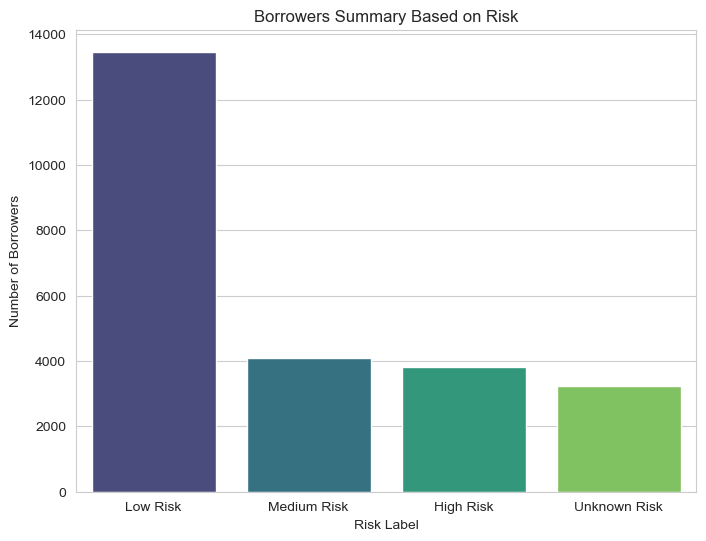

In [16]:
risk_summary = df['Risk Label'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(x=risk_summary.index, y=risk_summary.values, palette="viridis")
plt.title('Borrowers Summary Based on Risk')
plt.xlabel('Risk Label')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=0)
plt.show()

In [17]:
df['Bounce String'].unique()

array(['SSS', 'SSB', 'BBS', 'SBB', 'BB', 'SS', 'BS', 'SB', 'S', 'B',
       'FEMI', 'LSSBBS', 'LSSSSS', 'LSBSSS', 'LBSSSS', 'BSSBBB', 'LSSBSB',
       'LBBSBB', 'LSSBSS', 'LSSSBB', 'LSBSBS', 'LBBBBB', 'LBSSBS',
       'LBBSSB', 'LSBBBS', 'LSBBSS', 'LSSSBS', 'LSHSSB', 'LBSBBS',
       'SSSSSB', 'SSSBSB', 'SSSSS', 'SBBBB', 'BBBSS', 'BBBBS', 'BBSSS',
       'SBSSS', 'BSSBB', 'SSBBS', 'BSSSB', 'SSSBS', 'BSSBS', 'SSSSB',
       'SHSSS', 'SSSBB', 'BSSSS', 'SSBSS', 'BBSB', 'BSBS', 'SSSS', 'BSSS',
       'SBBS', 'SSBS', 'SBBB', 'SSSB', 'SBSB', 'HBBS', 'SBSS', 'SBS',
       'BBB', 'LBBBSS', 'SSBSBB', 'LSSSSB', 'SSBSSB', 'SBBBS', 'SBSSB',
       'BSBBS', 'SBBSB', 'BSBBB', 'BBBSB', 'SBSBS', 'BSSB', 'BBBB',
       'HSSS', 'BBBS', 'LBSSSB', 'LSBBBB', 'BSBSB', 'LBBSSS', 'BBBBB',
       'BSBSS', 'BSBB', 'BBSS', 'BHSBS', 'SSBB', 'SSSSSSSB', 'LSSSSSSS',
       'HHLSHSSS', 'LLLSSSSS', 'LHLSSSSS', 'LBBBSSSB', 'BSSSSSBS',
       'LLLBBSSB', 'LHSSSSSS', 'LLLSBBSS', 'LSSBBBBB', 'SSSSSSSS',
       'LLSSSSS',

2. Summary of borrowers (with graphs) based on tenure compeltion

In [18]:
def label_tenure(row):
    tenure_length = row['Tenure']
    bounce_string_length = len(row['Bounce String'])

    if bounce_string_length <= 2 or (row['Bounce String'] == 'FEMI'):
        return 'Early Tenure'
    elif (tenure_length - bounce_string_length -1 <= 3) and (row['Bounce String'] != 'FEMI'):
        return 'Late Tenure'
    else:
        return 'Mid Tenure'

# Apply the function to create a new column 'Tenure_Label'
df['Tenure_Label'] = df.apply(label_tenure, axis=1)

In [20]:
df[['Tenure','Loan Number','Bounce String','Tenure_Label']]

,Tenure,Loan Number,Bounce String,Tenure_Label
0,11,JZ6FS,SSS,Mid Tenure
1,11,RDIOY,SSB,Mid Tenure
2,14,WNW4L,BBS,Mid Tenure
3,10,6LBJS,SSS,Mid Tenure
4,10,ZFZUA,SSB,Mid Tenure
...,...,...,...,...
24577,8,EAX5C,FEMI,Early Tenure
24578,8,5MCE9,FEMI,Early Tenure
24579,8,9HO4Q,FEMI,Early Tenure
24580,8,3VV72,FEMI,Early Tenure


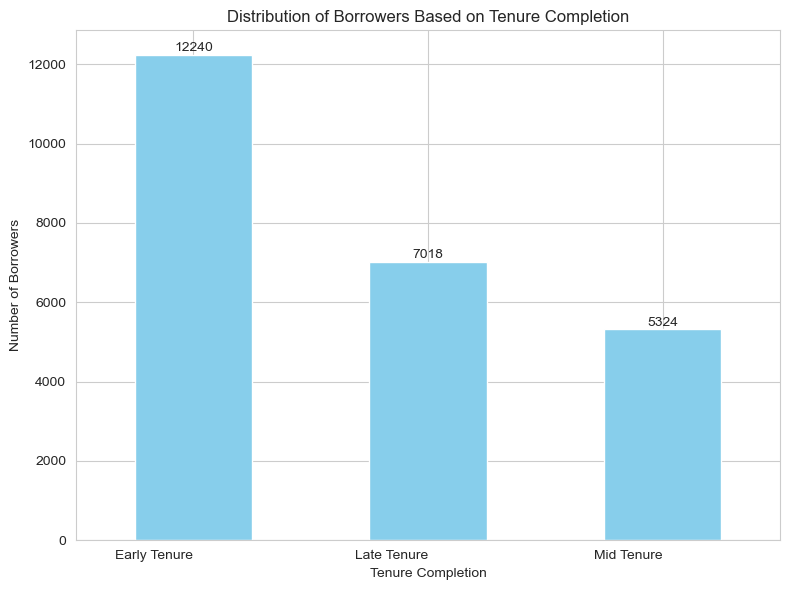

In [22]:
tenure_completion_counts = df['Tenure_Label'].value_counts()

# Plot the distribution of borrowers based on tenure completion
plt.figure(figsize=(8, 6))
tenure_completion_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Borrowers Based on Tenure Completion')
plt.xlabel('Tenure Completion')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=0, ha='right')

for i, count in enumerate(tenure_completion_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [23]:
df[df['Bounce String'] == 'FEMI']

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure_Label
255,1150,Karnataka,11,5.32,Bangalore,FEMI,12320,V2N62,Unknown Risk,Early Tenure
256,1054,Karnataka,11,7.00,Bellary,FEMI,11198,ULWKS,Unknown Risk,Early Tenure
257,1131,Karnataka,11,6.52,Bangalore,FEMI,12045,MEQ0B,Unknown Risk,Early Tenure
258,856,Karnataka,11,6.95,Chikkaballapur,FEMI,9097,XNMHI,Unknown Risk,Early Tenure
259,1310,Karnataka,10,5.25,DAKSHINA KANNADA,FEMI,12790,FL264,Unknown Risk,Early Tenure
...,...,...,...,...,...,...,...,...,...,...
24577,899,Andhra Pradesh,8,0.00,Chittoor,FEMI,7192,EAX5C,Unknown Risk,Early Tenure
24578,2699,Andhra Pradesh,8,0.00,Krishna,FEMI,21592,5MCE9,Unknown Risk,Early Tenure
24579,1540,Andhra Pradesh,8,0.00,Krishna,FEMI,12320,9HO4Q,Unknown Risk,Early Tenure
24580,824,Andhra Pradesh,8,0.00,Guntur,FEMI,6592,3VV72,Unknown Risk,Early Tenure


In [24]:
df[df['Tenure'] == 7]

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure_Label
351,901,Madhya Pradesh,7,18.10,Vidisha,LSSBBS,5943,ZVXZB,High Risk,Late Tenure
352,751,Madhya Pradesh,7,21.92,Rewa,LSSSSS,4893,ZCGBR,Medium Risk,Late Tenure
353,901,Madhya Pradesh,7,18.10,Damoh,LSBSSS,5943,QEMGC,High Risk,Late Tenure
354,751,Madhya Pradesh,7,21.92,Sidhi,LBSSSS,4893,HYZZD,High Risk,Late Tenure
355,751,Madhya Pradesh,7,21.92,Chhatarpur,LSSSSS,4893,T03EE,Medium Risk,Late Tenure
...,...,...,...,...,...,...,...,...,...,...
24507,2799,Andhra Pradesh,7,0.00,Guntur,FEMI,19593,YXGRC,Unknown Risk,Early Tenure
24511,2299,Andhra Pradesh,7,0.00,Krishna,FEMI,16093,NXRTZ,Unknown Risk,Early Tenure
24517,2974,Andhra Pradesh,7,0.00,Guntur,FEMI,20818,MQIQP,Unknown Risk,Early Tenure
24524,2299,Andhra Pradesh,7,0.00,East Godavari,FEMI,16093,RKT0S,Unknown Risk,Early Tenure


3. summary of borrowers (with graphs) based on ticket sizes

In [25]:
df_sorted = df.sort_values(by='Amount Pending')

# Step 2: Divide the sorted DataFrame into three equal-sized cohorts
total_amount_pending = df_sorted['Amount Pending'].sum()
cohort_size = total_amount_pending / 3

df_sorted['Cumulative Amount Pending'] = df_sorted['Amount Pending'].cumsum()

cohort_boundaries = [0, cohort_size, 2 * cohort_size, total_amount_pending]
cohort_labels = ['Low ticket size', 'Medium ticket size', 'High ticket size']

df_sorted['Cohort'] = pd.cut(df_sorted['Cumulative Amount Pending'], bins=cohort_boundaries, labels=cohort_labels, include_lowest=True)

# Step 3: Label each borrower based on the cohort they belong to
df['Cohort'] = df_sorted['Cohort']
df['Cohort']


0           Low ticket size
1           Low ticket size
2        Medium ticket size
3          High ticket size
4          High ticket size
                ...        
24577       Low ticket size
24578      High ticket size
24579       Low ticket size
24580       Low ticket size
24581    Medium ticket size
Name: Cohort, Length: 24582, dtype: category
Categories (3, object): ['Low ticket size' < 'Medium ticket size' < 'High ticket size']

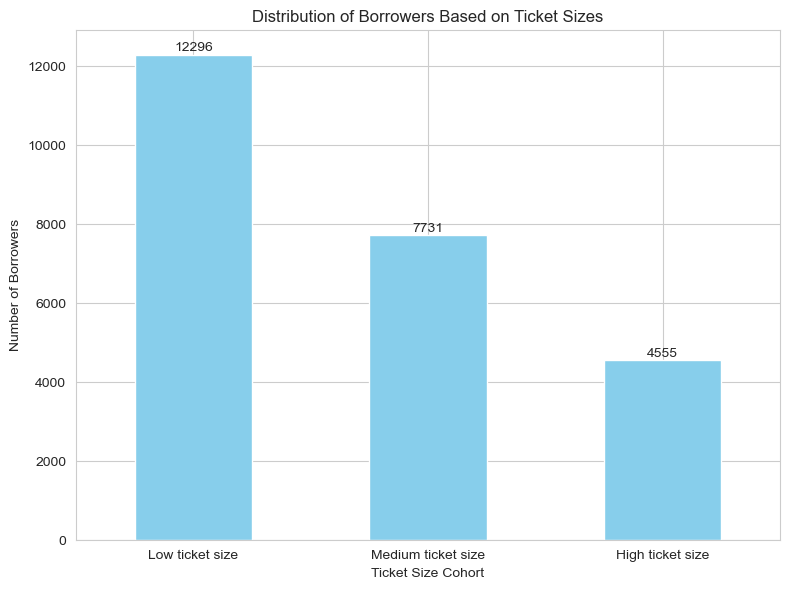

In [31]:
# Calculate the counts of borrowers based on ticket sizes
ticket_size_counts = df['Cohort'].value_counts(), 

# Plot the distribution of borrowers based on ticket sizes
plt.figure(figsize=(8, 6))
bar_plot = ticket_size_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Borrowers Based on Ticket Sizes')
plt.xlabel('Ticket Size Cohort')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=0)

# Annotate the bars with their counts
for i, count in enumerate(ticket_size_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [27]:
df_sorted['Cohort']

1534      Low ticket size
1982      Low ticket size
889       Low ticket size
265       Low ticket size
1486      Low ticket size
               ...       
9776     High ticket size
13946    High ticket size
23089    High ticket size
14009    High ticket size
13706    High ticket size
Name: Cohort, Length: 24582, dtype: category
Categories (3, object): ['Low ticket size' < 'Medium ticket size' < 'High ticket size']

In [32]:
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure_Label,Cohort
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Low Risk,Mid Tenure,Low ticket size
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,Medium Risk,Mid Tenure,Low ticket size
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High Risk,Mid Tenure,Medium ticket size
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Low Risk,Mid Tenure,High ticket size
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,Medium Risk,Mid Tenure,High ticket size


In [33]:
def filter_customers(row):
    # Customers with great repayment behavior (Low risk and unknown risk)
    condition_1 = (row['Risk Label'] == 'Low Risk') or (row['Risk Label'] == 'Unknown Risk')
    
    # Customers with first EMIs (FEMI as Bounce String)
    condition_2 = row['Bounce String'] == 'FEMI'
    
    # Customers who have low EMIs (low ticket size)
    condition_3 = row['Cohort'] == 'Low ticket size'
    
    return condition_1 and condition_2 and condition_3


In [34]:
df['Digital channel'] = df.apply(filter_customers, axis=1)

In [35]:
df[df['Digital channel']]

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure_Label,Cohort,Digital channel
255,1150,Karnataka,11,5.32,Bangalore,FEMI,12320,V2N62,Unknown Risk,Early Tenure,Low ticket size,True
256,1054,Karnataka,11,7.00,Bellary,FEMI,11198,ULWKS,Unknown Risk,Early Tenure,Low ticket size,True
257,1131,Karnataka,11,6.52,Bangalore,FEMI,12045,MEQ0B,Unknown Risk,Early Tenure,Low ticket size,True
258,856,Karnataka,11,6.95,Chikkaballapur,FEMI,9097,XNMHI,Unknown Risk,Early Tenure,Low ticket size,True
259,1310,Karnataka,10,5.25,DAKSHINA KANNADA,FEMI,12790,FL264,Unknown Risk,Early Tenure,Low ticket size,True
...,...,...,...,...,...,...,...,...,...,...,...,...
24568,1540,Andhra Pradesh,8,0.00,Vizianagaram,FEMI,12320,U96G0,Unknown Risk,Early Tenure,Low ticket size,True
24569,930,Andhra Pradesh,8,0.00,Guntur,FEMI,7440,1I4PN,Unknown Risk,Early Tenure,Low ticket size,True
24577,899,Andhra Pradesh,8,0.00,Chittoor,FEMI,7192,EAX5C,Unknown Risk,Early Tenure,Low ticket size,True
24579,1540,Andhra Pradesh,8,0.00,Krishna,FEMI,12320,9HO4Q,Unknown Risk,Early Tenure,Low ticket size,True


In [37]:
df['State'].unique()

array(['Karnataka', 'Madhya Pradesh', 'Maharashtra', 'Tamil Nadu',
       'Telangana', 'Kerala', 'Andhra Pradesh'], dtype=object)

In [38]:
def check_conditions(row):
    
    # Condition 1: Customers who have had low bounce behavior
    condition_01 = row['Risk Label'] in ['Low Risk', 'Medium Risk', 'Unknown Risk']
    
    # Condition 2: Customers with low or medium sized EMIs
    condition_02 = row['Cohort'] in ['Low ticket size', 'Medium ticket size']
    
    # Return True if all conditions are met, otherwise False
    return condition_01 and condition_02

In [39]:
df['Voice bot'] = df.apply(check_conditions, axis=1)

In [40]:
df[df['Voice bot']]

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure_Label,Cohort,Digital channel,Voice bot
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Low Risk,Mid Tenure,Low ticket size,False,True
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,Medium Risk,Mid Tenure,Low ticket size,False,True
5,2172,Karnataka,14,4.36,DAKSHINA KANNADA,SSB,29596,T07RO,Medium Risk,Mid Tenure,Medium ticket size,False,True
6,1041,Karnataka,10,5.77,BANGALORE RURAL,SSB,10140,Y0M29,Medium Risk,Mid Tenure,Low ticket size,False,True
7,1585,Karnataka,10,6.47,Bangalore,SSS,15390,OE4AV,Low Risk,Mid Tenure,Low ticket size,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24570,1949,Andhra Pradesh,8,0.00,Chittoor,FEMI,15592,B78Q2,Unknown Risk,Early Tenure,Medium ticket size,False,True
24577,899,Andhra Pradesh,8,0.00,Chittoor,FEMI,7192,EAX5C,Unknown Risk,Early Tenure,Low ticket size,True,True
24579,1540,Andhra Pradesh,8,0.00,Krishna,FEMI,12320,9HO4Q,Unknown Risk,Early Tenure,Low ticket size,True,True
24580,824,Andhra Pradesh,8,0.00,Guntur,FEMI,6592,3VV72,Unknown Risk,Early Tenure,Low ticket size,True,True


In [41]:
def allocate_resources(row):
    if row['Risk Label'] == 'Low Risk' or row['Risk Label'] == "Unknown Risk":
        return 'Digital'
    elif row['Risk Label'] == 'Medium Risk':
        return 'Voice Bot'
    else:
        return 'Human Calling'

df['Resource Allocation'] = df.apply(allocate_resources, axis=1)

# Calculate total spend for each resource
resource_costs = {'Digital': 5, 'Voice Bot': 10, 'Human Calling': 50}
df['Resource Cost'] = df['Resource Allocation'].map(resource_costs)

In [43]:
# Calculate total spend
total_spend = df['Resource Cost'].sum()

In [47]:
df.head(30)

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure_Label,Cohort,Digital channel,Voice bot,Resource Allocation,Resource Cost
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Low Risk,Mid Tenure,Low ticket size,False,True,Digital,5
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,Medium Risk,Mid Tenure,Low ticket size,False,True,Voice Bot,10
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High Risk,Mid Tenure,Medium ticket size,False,False,Human Calling,50
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Low Risk,Mid Tenure,High ticket size,False,False,Digital,5
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,Medium Risk,Mid Tenure,High ticket size,False,False,Voice Bot,10
5,2172,Karnataka,14,4.36,DAKSHINA KANNADA,SSB,29596,T07RO,Medium Risk,Mid Tenure,Medium ticket size,False,True,Voice Bot,10
6,1041,Karnataka,10,5.77,BANGALORE RURAL,SSB,10140,Y0M29,Medium Risk,Mid Tenure,Low ticket size,False,True,Voice Bot,10
7,1585,Karnataka,10,6.47,Bangalore,SSS,15390,OE4AV,Low Risk,Mid Tenure,Low ticket size,False,True,Digital,5
8,983,Karnataka,11,6.03,DAKSHINA KANNADA,SSS,10494,2MR0X,Low Risk,Mid Tenure,Low ticket size,False,True,Digital,5
9,1600,Karnataka,14,4.80,Mysore,SSS,21742,MK67U,Low Risk,Mid Tenure,Medium ticket size,False,True,Digital,5
